In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature
import cartopy.crs as ccrs
import hadcm3_toolbox as tb
import sys
sys.path.append('/nfs/see-fs-01_users/eeymr/scripts/hadcm3_deglac_glac1d/glac1d_meltwater')
import saving

To replace my usual test.ipynb very difficult to read... First plots and idea to keep

**Goal** : Plot the AMOC, mean SAT, SST and SSS of the control experiment

In [2]:
# Computation of max AMOC at 26.5N

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.merid.annual.nc')
lat_moc, depth_moc, t_moc = ds.latitude.values, ds.depth.values, ds.t.values
amoc = ds.Merid_Atlantic.values
print(ds)

id_lat = tb.lat_to_index(lat_moc,26.5)
print(id_lat, lat_moc[id_lat])
max_amoc,t_moc_tab = np.zeros((len(t_moc))), np.zeros((len(t_moc)))
for t in range(len(t_moc)):
    max_amoc[t] = np.max(amoc[t,:,id_lat])
    t_moc_tab[t] = t_moc[t].year
max_amoc = tb.running_mean(max_amoc,10)

<xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 2612)
Coordinates:
  * depth           (depth) float32 0.0 10.0 20.0 ... 4269.5 4884.8 5500.0996
  * latitude        (latitude) float32 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75
  * t               (t) object 2552-06-01 00:00:00 ... 5163-06-01 00:00:00
Data variables:
    Merid_Atlantic  (t, depth, latitude) float32 nan nan nan nan ... nan nan nan
    Merid_Global    (t, depth, latitude) float32 ...
    Merid_Indian    (t, depth, latitude) float32 ...
    Merid_Pacific   (t, depth, latitude) float32 ...
Attributes:
    title:                      Produced using writenc6 program by PJV
    history:                    Mon Feb 17 16:47:23 2020: ncrcat -O --no_tmp_...
    NCO:                        "4.6.1"
    history_of_appended_files:  Mon Dec  2 16:17:31 2019: Appended file /nfs/...
    nco_openmp_thread_number:   1
92 26.25


In [3]:
# Computation of global SAT

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.tempsurf.monthly.nc')
lon_sat, lat_sat, t_sat = ds.longitude.values, ds.latitude.values, ds.t.values
sat = ds.temp_mm_srf.isel(surface=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sat,lat_sat,75,42.5)
mean_sat,t_sat_tab = np.zeros((len(t_sat)//12)),np.zeros((len(t_sat)//12)) 
for t in range(len(t_sat)//12):
    mean_sat[t] = np.nanmean(sat[12*t:12*(t+1),:,:])
    t_sat_tab[t] = t_sat[12*t].year
mean_sat = tb.running_mean(mean_sat,10)-273.15

<xarray.Dataset>
Dimensions:      (latitude: 73, longitude: 96, surface: 1, t: 4309)
Coordinates:
  * latitude     (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude    (longitude) float32 0.0 3.75 7.5 11.25 ... 348.75 352.5 356.25
  * surface      (surface) float32 0.0
  * t            (t) object 2551-12-16 00:00:00 ... 2910-12-16 00:00:00
Data variables:
    temp_mm_srf  (t, surface, latitude, longitude) float32 ...
Attributes:
    history:                   Fri Dec  6 01:07:25 2019: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


In [4]:
# Computation of global SST

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.oceansurftemppf.monthly.nc')
lon_sst, lat_sst, t_sst = ds.longitude.values, ds.latitude.values, ds.t.values
lon_sst_b, lat_sst_b = tb.coordinate_bounds(lon_sst), tb.coordinate_bounds(lat_sst)
sst = ds.temp_mm_uo.isel(unspecified=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sst,lat_sst,75,42.5)
mean_sst,t_sst_tab = np.zeros((len(t_sst)//12)),np.zeros((len(t_sst)//12)) 
for t in range(len(t_sst)//12):
    mean_sst[t] = np.nanmean(sst[12*t:12*(t+1),:,:])
    t_sst_tab[t] = t_sst[12*t].year
mean_sst = tb.running_mean(mean_sst,10)

<xarray.Dataset>
Dimensions:      (latitude: 144, longitude: 288, t: 31345, unspecified: 1)
Coordinates:
  * latitude     (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude    (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * t            (t) object 2551-12-16 00:00:00 ... 5163-12-16 00:00:00
  * unspecified  (unspecified) float32 -1.0
Data variables:
    temp_mm_uo   (t, unspecified, latitude, longitude) float32 ...
Attributes:
    history:                   Mon Feb 17 17:12:41 2020: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


In [5]:
# Computation of global SSS

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.oceansalipf01.monthly.nc')
lon_sss, lat_sss, t_sss = ds.longitude.values, ds.latitude.values, ds.t.values
sss = ds.salinity_mm_dpth.isel(depth_1=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sss,lat_sss,75,42.5)
mean_sss,t_sss_tab = np.zeros((len(t_sss)//12)),np.zeros((len(t_sss)//12)) 
for t in range(len(t_sss)//12):
    mean_sss[t] = np.nanmean(sss[12*t:12*(t+1),:,:])
    t_sss_tab[t] = t_sss[12*t].year
mean_sss = tb.running_mean(mean_sss,10)*1000 + 35

<xarray.Dataset>
Dimensions:           (depth_1: 1, latitude: 144, longitude: 288, t: 31345)
Coordinates:
  * depth_1           (depth_1) float32 5.0
  * latitude          (latitude) float32 -89.375 -88.125 ... 88.125 89.375
  * longitude         (longitude) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * t                 (t) object 2551-12-16 00:00:00 ... 5163-12-16 00:00:00
Data variables:
    salinity_mm_dpth  (t, depth_1, latitude, longitude) float32 ...
Attributes:
    history:                   Mon Feb 17 17:39:03 2020: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


(0, 36)

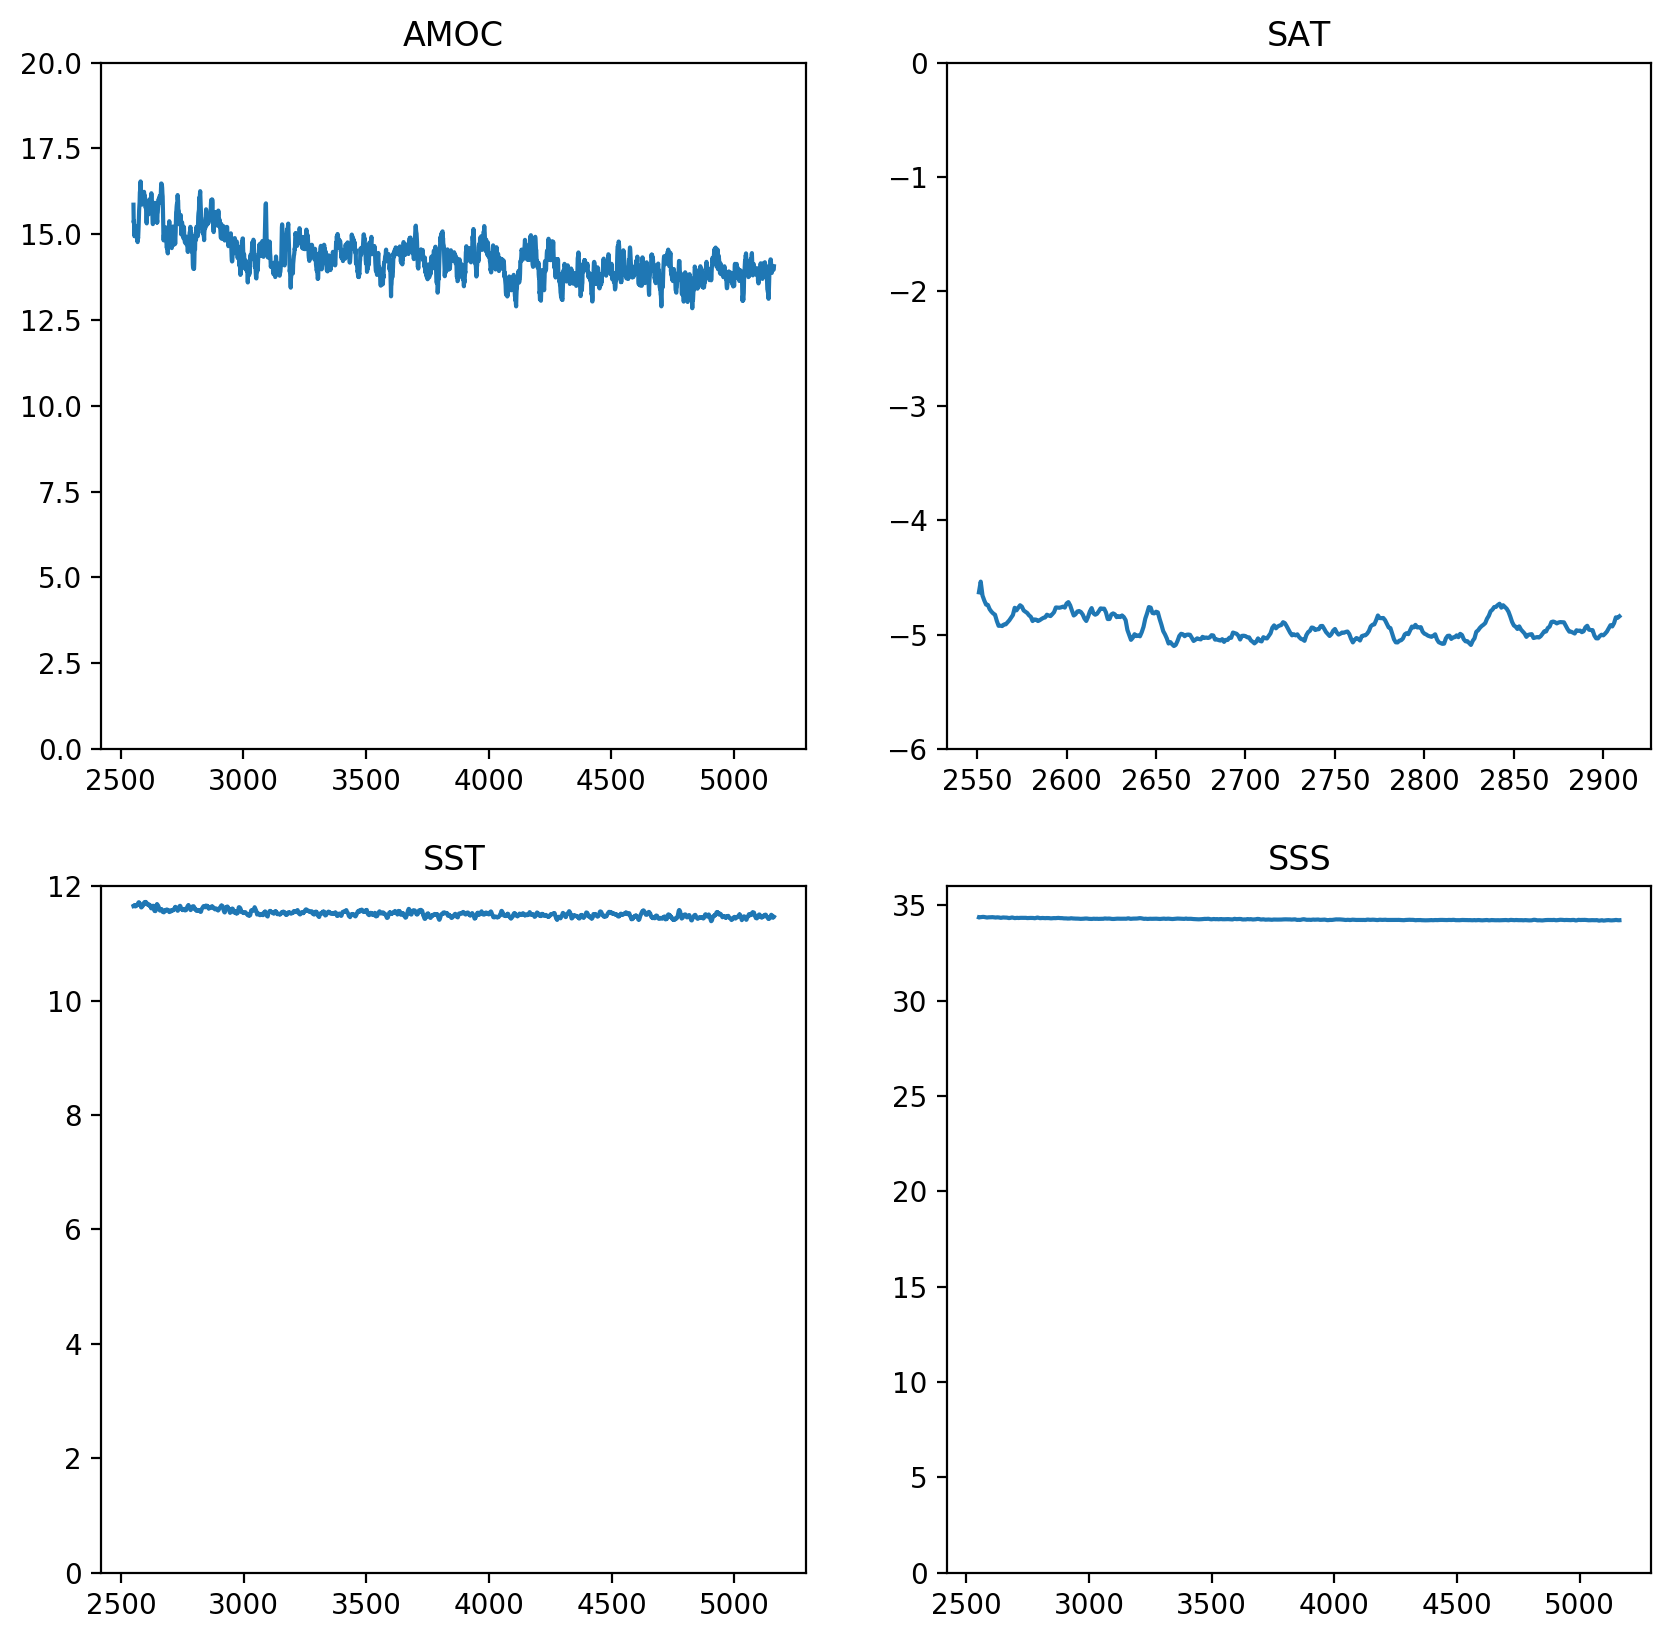

In [6]:
figMap,((axAMOC, axSAT),(axSST, axSSS)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=200)

axAMOC.plot(t_moc_tab, max_amoc)
axAMOC.set_title("AMOC")
axAMOC.set_ylim([0,20])
axSAT.plot(t_sat_tab, mean_sat)
axSAT.set_title("SAT")
axSAT.set_ylim([-6,0])
axSST.plot(t_sst_tab, mean_sst)
axSST.set_title("SST")
axSST.set_ylim([0,12])
axSSS.plot(t_sss_tab, mean_sss)
axSSS.set_title("SSS")
axSSS.set_ylim([0,36])

**Goal** : Compute the mean correction flux

In [2]:
ds_lsm_ref = xr.open_dataset("/nfs/annie/eeymr/work/data/Proj_GLAC1D/lsm/teadv3.qrparm.omask.nc")
ds_wfix_ref = xr.open_dataset("/nfs/annie/eeymr/work/data/Proj_GLAC1D/waterfix/teadv3.qrparam.waterfix.hadcm3.nc")
ds_lsm = xr.open_dataset("/nfs/annie/eeymr/work/data/Proj_GLAC1D/lsm/teada3.qrparm.omask.nc")
ds_wfix = xr.open_dataset("/nfs/annie/eeymr/work/data/Proj_GLAC1D/waterfix/teada3.qrparam.waterfix.hadcm3.nc")

lon, lat = ds_lsm.longitude.values, ds_lsm.latitude.values
lon_b, lat_b = tb.coordinate_bounds(lon), tb.coordinate_bounds(lat)
lsm = ds_lsm.lsm.values
wfix, wfix_ref = ds_wfix.field672.isel(depth=0).isel(t=0).values[:,:-2], ds_wfix_ref.field672.isel(depth=0).isel(t=0).values[:,:-2]

start_date, end_date = 4000, 5000

path_ref = "/nfs/see-fs-01_users/eeymr/dump2hold/xosfa/pg/"
waterfix_patch = saving.drift_waterfix_patch(path_ref, "xosfa", ds_wfix, start_date, end_date)
corrected_waterfix = saving.corrected_waterfix_patch(waterfix_patch, ds_lsm, ds_wfix)

waterfix_patch_ref = saving.drift_waterfix_patch(path_ref, "xosfa", ds_wfix_ref, start_date, end_date)
corrected_waterfix_ref = saving.corrected_waterfix_patch(waterfix_patch_ref, ds_lsm_ref, ds_wfix_ref)

5.064960616231158e-07
[[          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]
 [          nan           nan           nan ...           nan
            nan           nan]
 ...
 [1.2107605e-06 1.2107605e-06 1.2107605e-06 ... 1.2107605e-06
  1.2107605e-06 1.2107605e-06]
 [1.2107605e-06 1.2107605e-06 1.2107605e-06 ... 1.2107605e-06
  1.2107605e-06 1.2107605e-06]
 [          nan           nan           nan ...           nan
            nan           nan]]


For the 21kya land sea mask

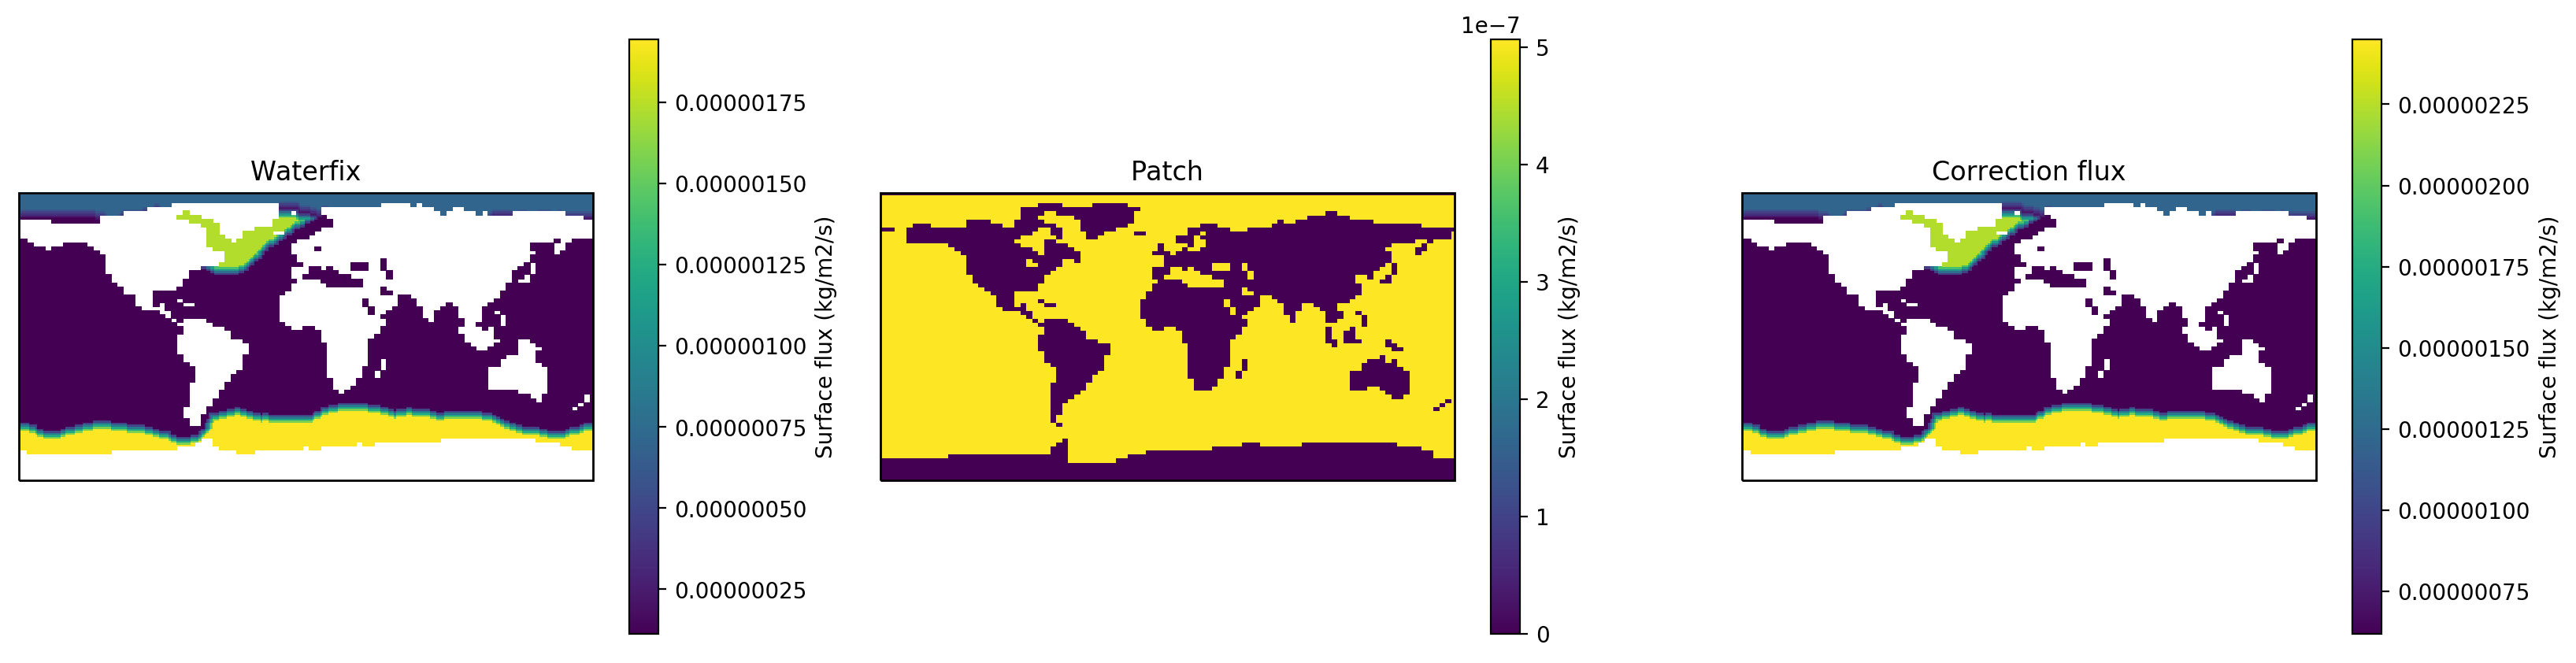

In [6]:
projection_map = ccrs.PlateCarree()
figMap,(axWaterfix, axPatch, axCorrected) = plt.subplots(nrows=1, ncols=3, subplot_kw={'projection':projection_map}, figsize=(20,5), dpi=200)

cm_wfix = axWaterfix.pcolormesh(lon_b, lat_b, wfix_ref, transform=ccrs.PlateCarree())
axWaterfix.set_global()
axWaterfix.set_title("Waterfix")
figMap.colorbar(mappable = cm_wfix, ax=axWaterfix, label="Surface flux (kg/m2/s)")

cm_patch = axPatch.pcolormesh(lon_b, lat_b, waterfix_patch_ref * (1-lsm), transform=ccrs.PlateCarree())
axPatch.set_global()
axPatch.set_title("Patch")
figMap.colorbar(mappable = cm_patch, ax=axPatch, label="Surface flux (kg/m2/s)")

cm_corrected = axCorrected.pcolormesh(lon_b, lat_b, corrected_waterfix_ref, transform=ccrs.PlateCarree())
axCorrected.set_global()
axCorrected.set_title("Correction flux")
figMap.colorbar(mappable = cm_corrected, ax=axCorrected, label="Surface flux (kg/m2/s)")

# a refaire avec la meme norme partout!

For the 0kya land sea mask

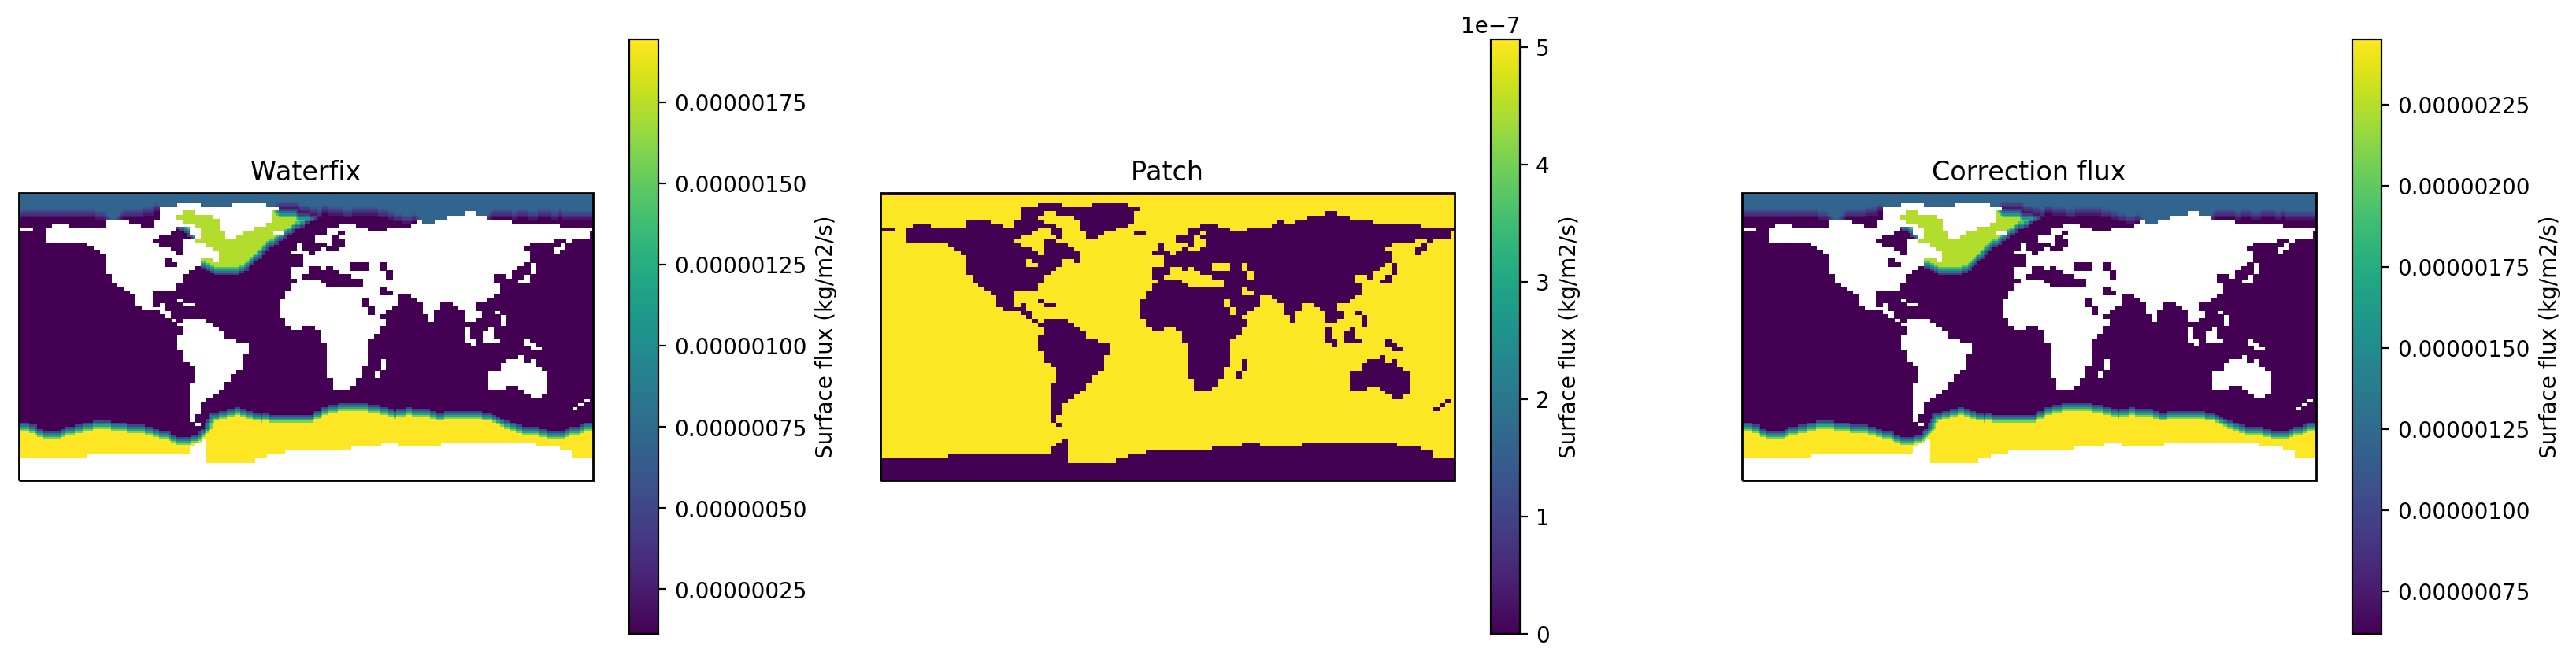

In [9]:
projection_map = ccrs.PlateCarree()
figMap,(axWaterfix, axPatch, axCorrected) = plt.subplots(nrows=1, ncols=3, subplot_kw={'projection':projection_map}, figsize=(20,5), dpi=200)

cm_wfix = axWaterfix.pcolormesh(lon_b, lat_b, wfix, transform=ccrs.PlateCarree())
axWaterfix.set_global()
axWaterfix.set_title("Waterfix")
figMap.colorbar(mappable = cm_wfix, ax=axWaterfix, label="Surface flux (kg/m2/s)")

cm_patch = axPatch.pcolormesh(lon_b, lat_b, waterfix_patch * (1-lsm), transform=ccrs.PlateCarree())
axPatch.set_global()
axPatch.set_title("Patch")
figMap.colorbar(mappable = cm_patch, ax=axPatch, label="Surface flux (kg/m2/s)")

cm_corrected = axCorrected.pcolormesh(lon_b, lat_b, corrected_waterfix, transform=ccrs.PlateCarree())
axCorrected.set_global()
axCorrected.set_title("Correction flux")
figMap.colorbar(mappable = cm_corrected, ax=axCorrected, label="Surface flux (kg/m2/s)")

In [10]:
# Total flux from the correction file:
print(f"Total flux : {np.nansum(waterfix_patch * (1-lsm))}")

Total flux : 0.01376960426568985


**Goal**: plot the time serie of the correction flux.

In [13]:
drifts = np.zeros((end_date - start_date))

for year in np.arange(start_date, end_date, 1):
    ds = xr.open_dataset(f'/nfs/see-fs-01_users/eeymr/dump2hold/xosfa/pg/xosfao#pg00000{year}c1+.nc')
    drifts[year - start_date] = np.nansum(ds.srfSalFlux_ym_uo_1.isel(t=0).isel(unspecified=0).values - wfix_ref)

Text(0.5,1,'Drift correction (Sv)')

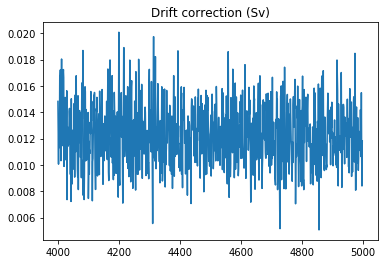

In [14]:
plt.plot(np.arange(start_date, end_date, 1), drifts)
plt.title("Drift correction (Sv)")

**Goal**: Get the right format for the waterfix patch

In [23]:
corrected_waterfix_4d = np.resize(waterfix_patch * (1-lsm), (ds_wfix.field672.shape[0], ds_wfix.field672.shape[1], ds_wfix.field672.shape[2], ds_wfix.field672.shape[3]-2))
print(ds_wfix_ref.field672.shape)
print(corrected_waterfix_4d.shape)
print((waterfix_patch * (1-lsm)).shape)
print(corrected_waterfix_4d)

(1, 1, 144, 290)
(1, 1, 144, 288)
(144, 288)
[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]
   ...
   [5.0649606e-07 5.0649606e-07 5.0649606e-07 ... 5.0649606e-07
    5.0649606e-07 5.0649606e-07]
   [5.0649606e-07 5.0649606e-07 5.0649606e-07 ... 5.0649606e-07
    5.0649606e-07 5.0649606e-07]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    0.0000000e+00 0.0000000e+00]]]]


In [21]:
ds_wfix_ref.field672.shape

(1, 1, 144, 290)